In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('airline_passengers.csv')
dataset.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
dataset['Month'] = pd.to_datetime(dataset['Month'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [5]:
dataset.isnull().sum()


Month                      0
Thousands of Passengers    0
dtype: int64

In [6]:
dataset.head()

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [7]:
dataset.set_index('Month',inplace=True)

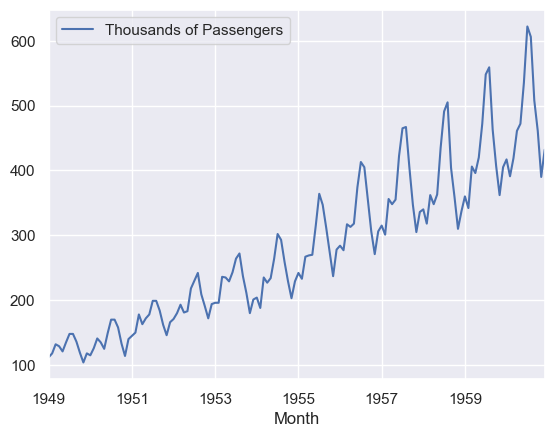

In [8]:
dataset.plot()
plt.show()

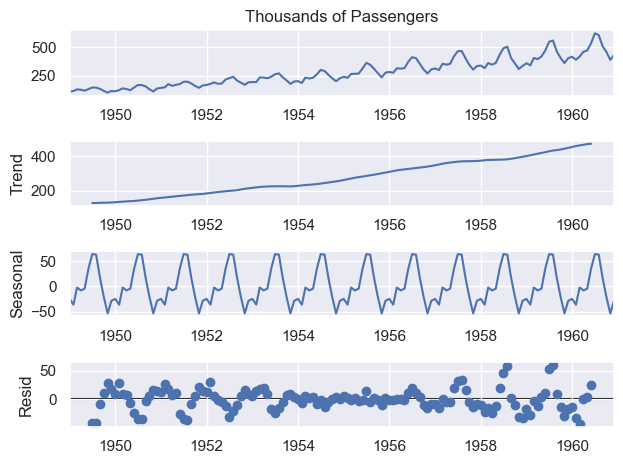

In [9]:
#decomposition to check dataset pattern
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset['Thousands of Passengers'],model='additive',period=12)
decomposition.plot()
plt.show()

In [10]:
# Check autocorrelation 
import statsmodels.api as sm
sm.stats.durbin_watson(dataset['Thousands of Passengers'])  #<2 it means positive autocorrelation means timeseries needs to be used

0.0121527966037621

In [11]:
#check time series is stationary or not
from statsmodels.tsa.stattools import adfuller
adfuller(dataset['Thousands of Passengers'])

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [12]:
def adfcheck(timeseries):
    results = adfuller(timeseries)
    print("**********Augmented Dickey fuller Test***********")
    labels = ['ADF Stats test','P value','#Lags','No of obs']
    
    for a,b in zip(results, labels):
        print(b+":"+str(a))
        
    if results[1]<=0.05:
        print("Strong evidence against null hypothesis and my timeseries is stationary")
    else:
        print("Week evidence against null hypothesis and my timeseries is non stationary")

In [13]:
adfcheck(dataset['Thousands of Passengers'])

**********Augmented Dickey fuller Test***********
ADF Stats test:0.8153688792060543
P value:0.9918802434376411
#Lags:13
No of obs:130
Week evidence against null hypothesis and my timeseries is non stationary


In [14]:
dataset['First Diff'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(1)

In [15]:
dataset.head()

,Thousands of Passengers,First Diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [16]:
adfcheck(dataset['First Diff'].dropna())

**********Augmented Dickey fuller Test***********
ADF Stats test:-2.8292668241700034
P value:0.054213290283824954
#Lags:12
No of obs:130
Week evidence against null hypothesis and my timeseries is non stationary


In [17]:
dataset['Second Diff'] = dataset['First Diff'] - dataset['First Diff'].shift(1)


In [18]:
adfcheck(dataset['Second Diff'].dropna()) #D=2/

**********Augmented Dickey fuller Test***********
ADF Stats test:-16.384231542468488
P value:2.7328918500143186e-29
#Lags:11
No of obs:130
Strong evidence against null hypothesis and my timeseries is stationary


In [19]:
dataset['seasonality'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(12)

In [20]:
dataset.head(20)

,Thousands of Passengers,First Diff,Second Diff,seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN


In [21]:
adfcheck(dataset['seasonality'].dropna()) #D=1

**********Augmented Dickey fuller Test***********
ADF Stats test:-3.3830207264924805
P value:0.011551493085514982
#Lags:1
No of obs:130
Strong evidence against null hypothesis and my timeseries is stationary


In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

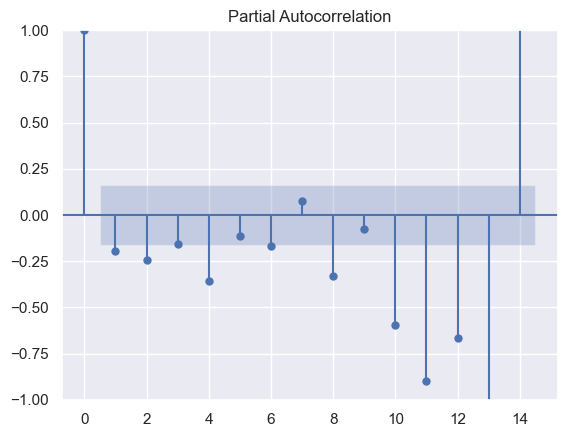

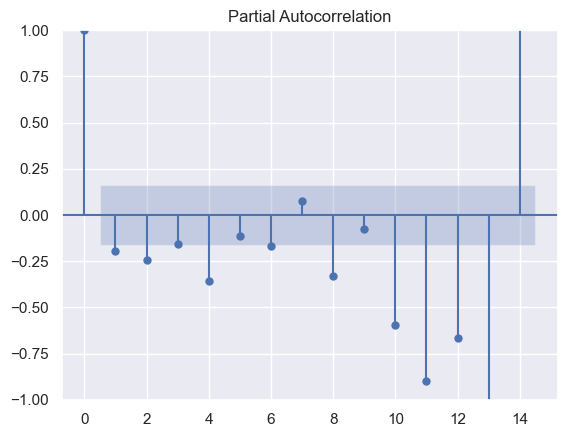

In [23]:
plot_pacf(dataset['Second Diff'].dropna(),lags=14) #from graph we can see p=4

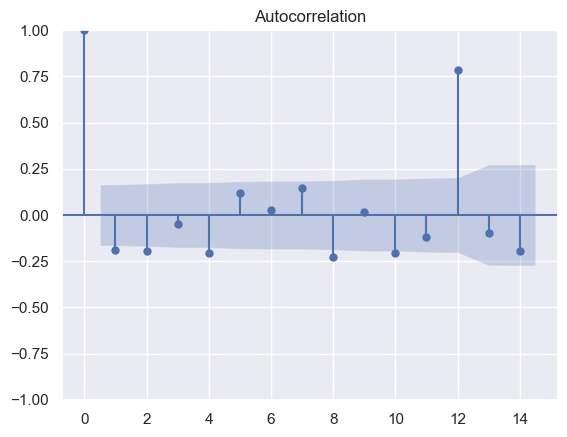

In [24]:
plot_acf(dataset['Second Diff'].dropna(),lags=14) #from graph we can see q=2
plt.show()

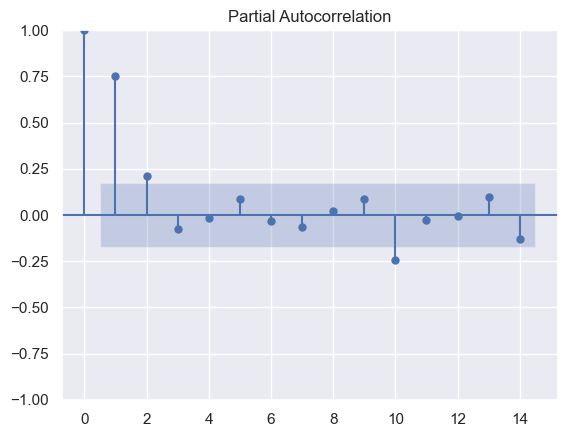

In [25]:
#Now checking for seasonality
plot_pacf(dataset['seasonality'].dropna(),lags=14)   # from graph we can see P=2
plt.show()

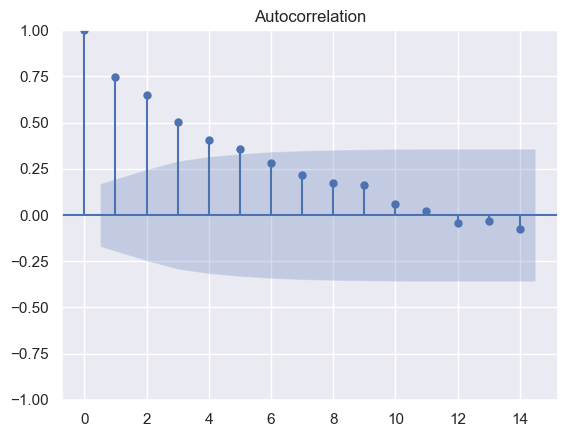

In [26]:
plot_acf(dataset['seasonality'].dropna(),lags=14)   # from graph we can see Q=5
plt.show()

# Build ARIMA model for time series forecasting

In [27]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [28]:
model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'],order=(4,2,2),seasonal_order=(2,1,1,12))
result = model.fit()
print(result.summary())

C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:              Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, [1], 12)   Log Likelihood                -497.783
Date:                              Sat, 24 Jun 2023   AIC                           1015.567
Time:                                      11:26:22   BIC                           1044.242
Sample:                                  01-01-1949   HQIC                          1027.218
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3607      0.097    -14.054      0.000      -1.550      -1.171
ar.L2         -0.49

In [44]:
# Auto method

import itertools

p = d = q = range(0, 2) # suggestion is to check with 0 to 5
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print("Few paramater combinations are :")
print('{} x {}'.format(pdq[1], seasonal_pdq[1]))
print('{} x {}'.format(pdq[2], seasonal_pdq[2]))

Few paramater combinations are :
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)


In [45]:
for param in pdq:
    # pdq means treand and param_seasonal means seasonality
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'],
                                 order= param, seasonal_order=param_seasonal,
                                             enforce_stationarity=False,
                                              enforce_invertibility=False) 
            result = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Like

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:2044.4329486427587
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1887.3116639280925
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1315.9211929474204
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1156.291490150855
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1118.6259190717344
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1107.2562043236824
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1109.2437994445115


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequen

ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1033.6172166729834
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:1846.0789377571557


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1567.9916312316923
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:1196.9983614399885


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:1072.1382984044321
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:1071.0026810382253


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1049.5801418612084
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:1059.5112223290382


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:985.3346478033282
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1405.0006612949667
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1194.713001097972
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1024.4816429833936


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequen

ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:937.7995265380563
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1031.4838983661916
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1015.0000347579942
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:944.4876301158425


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequen

ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:939.7984372654337
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1379.4417180072924
ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1181.6309458759256


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequen

ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1006.791904739727
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:920.6308317604718


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1014.2239031825341


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:985.1362327310189
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:934.7975425749117


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:920.3192974989178
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:1415.9068815931885
ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1205.3907786172613


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequen

ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:1029.9773091701022
ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:944.3854921533156


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:1017.315549357125


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:1007.0272556175911
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:944.0441660823766


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:945.4400866842676
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:1390.4515018414986


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:1192.2949631619508
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:1014.2547824625816


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:929.4329707892176


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:1009.5891017294688


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:989.1764737559905
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:935.816334821808


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:935.9152860554148
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1392.9437938537153
ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1190.534292907625
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:1013.3680449838157


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequen

ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:928.1312837305537
ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1007.6496486407449


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:995.4636249453617
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:927.59043747103


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:928.1418620185426
ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1377.2926858930787


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1185.334035969287
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:1008.5528813487763


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:922.4148960116289
ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1009.1896100683156


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:987.1339264658291
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:929.575620833037


C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nehaa\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:922.205377435188


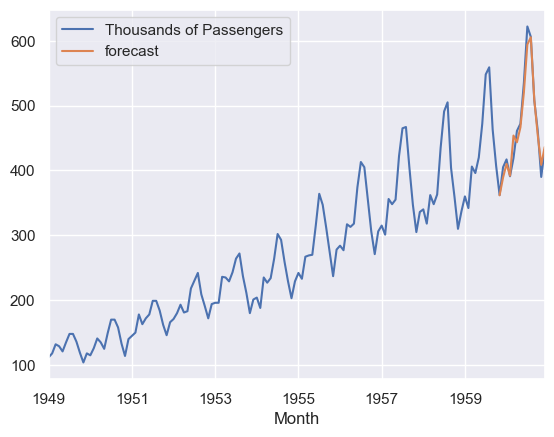

In [57]:
#predict the dataset
dataset['forecast'] = result.predict(start=130,end=144,dynamic=True)
dataset[['Thousands of Passengers','forecast']].plot()
plt.show()

In [47]:
#predict 5 years monthly data
from pandas.tseries.offsets import DateOffset



In [31]:
dataset.tail(20)

,Thousands of Passengers,First Diff,Second Diff,seasonality,forecast
Month,,,,,
1959-05-01,420,24.0,34.0,57.0,NaN
1959-06-01,472,52.0,28.0,37.0,NaN
1959-07-01,548,76.0,24.0,57.0,NaN
1959-08-01,559,11.0,-65.0,54.0,NaN
1959-09-01,463,-96.0,-107.0,59.0,NaN
1959-10-01,407,-56.0,40.0,48.0,NaN
1959-11-01,362,-45.0,11.0,52.0,355.670056
1959-12-01,405,43.0,88.0,68.0,388.268675
1960-01-01,417,12.0,-31.0,57.0,404.221799


In [48]:
future_dates = [dataset.index[-1] + DateOffset(months = x) for x in range(61)]
future_dates

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-

In [49]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=dataset.columns)
future_dates_df

,Thousands of Passengers,First Diff,Second Diff,seasonality,forecast
1961-01-01,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN,NaN
1961-06-01,NaN,NaN,NaN,NaN,NaN
1961-07-01,NaN,NaN,NaN,NaN,NaN
1961-08-01,NaN,NaN,NaN,NaN,NaN
1961-09-01,NaN,NaN,NaN,NaN,NaN
1961-10-01,NaN,NaN,NaN,NaN,NaN


In [50]:
dataset.tail()

,Thousands of Passengers,First Diff,Second Diff,seasonality,forecast
Month,,,,,
1960-08-01,606,-16.0,-103.0,47.0,602.189421
1960-09-01,508,-98.0,-82.0,45.0,503.349383
1960-10-01,461,-47.0,51.0,54.0,449.827224
1960-11-01,390,-71.0,-24.0,28.0,403.527894
1960-12-01,432,42.0,113.0,27.0,430.234704


In [51]:
future_df=pd.concat([dataset,future_dates_df])

In [52]:
len(future_df)

204

In [53]:
future_df.head()

,Thousands of Passengers,First Diff,Second Diff,seasonality,forecast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN


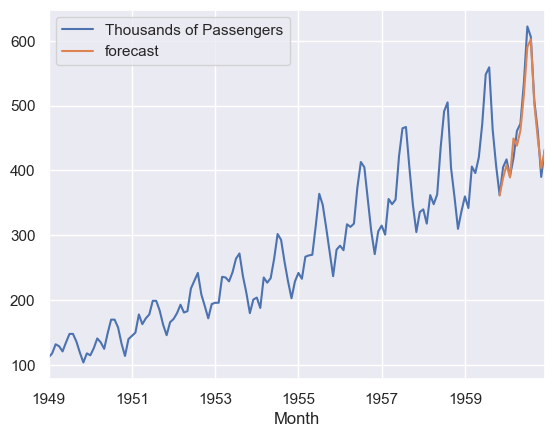

In [54]:
# Predict the given dataset (to split into train and test series)
dataset['forecast'] = result.predict(start=130, end=144, dynamic=True)
dataset[['Thousands of Passengers', 'forecast']].plot()
plt.show()

In [39]:
print(future_df)

           Thousands of Passengers  First Diff  Second Diff  seasonality  \
1949-01-01                     112         NaN          NaN          NaN   
1949-02-01                     118         6.0          NaN          NaN   
1949-03-01                     132        14.0          8.0          NaN   
1949-04-01                     129        -3.0        -17.0          NaN   
1949-05-01                     121        -8.0         -5.0          NaN   
...                            ...         ...          ...          ...   
1965-08-01                     NaN         NaN          NaN          NaN   
1965-09-01                     NaN         NaN          NaN          NaN   
1965-10-01                     NaN         NaN          NaN          NaN   
1965-11-01                     NaN         NaN          NaN          NaN   
1965-12-01                     NaN         NaN          NaN          NaN   

            forecast  
1949-01-01       NaN  
1949-02-01       NaN  
1949-03-01       N

In [40]:
dataset.head()

,Thousands of Passengers,First Diff,Second Diff,seasonality,forecast
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN


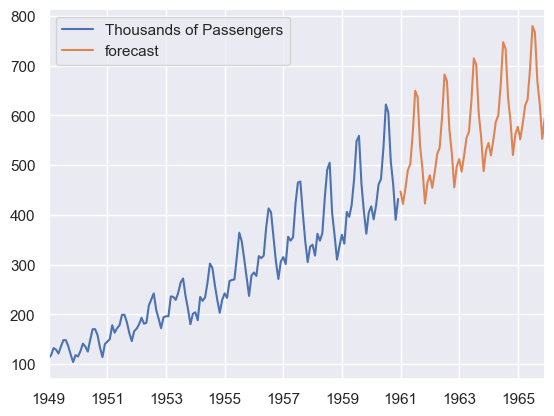

In [58]:
future_df['forecast']=result.predict(start=144,end=204,dynamic=True)
future_df[['Thousands of Passengers','forecast']].plot()
plt.show()

In [42]:
future_df.tail(65)

,Thousands of Passengers,First Diff,Second Diff,seasonality,forecast
1960-08-01,606,-16.0,-103.0,47.0,NaN
1960-09-01,508,-98.0,-82.0,45.0,NaN
1960-10-01,461,-47.0,51.0,54.0,NaN
1960-11-01,390,-71.0,-24.0,28.0,NaN
1960-12-01,432,42.0,113.0,27.0,NaN
...,...,...,...,...,...
1965-08-01,NaN,NaN,NaN,NaN,893.107384
1965-09-01,NaN,NaN,NaN,NaN,765.282938
1965-10-01,NaN,NaN,NaN,NaN,701.953191
1965-11-01,NaN,NaN,NaN,NaN,619.902403


In [43]:
future_df.to_csv("5Year_Forecasting.csv")